#Statistics Lab - Final Paper

##Habait Hayehudi
###Orel Ben Israel (ID 205614845) & Shahar Gilad (ID 205847023)

In [1]:
#**Remove Code Chunks By Using Raw NBConvert**

from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw
code."></form>''')

In [107]:
# %%shell
# jupyter nbconvert --to html /content/Final_Statistics_Lab.ipynb

[NbConvertApp] Converting notebook /content/Final_Statistics_Lab.ipynb to html
[NbConvertApp] Writing 1374980 bytes to /content/Final_Statistics_Lab.html


In [3]:
#Importing the relevant libraries

import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)

from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import io
import warnings
import scipy as sp
from scipy import stats
warnings.filterwarnings("ignore")

import statistics as st
import math

# scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [4]:
#Open the drive folder
#Mount_drive in google_colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import files
uploaded = files.upload()

Saving eshkol_hevrati_calcali.xlsx to eshkol_hevrati_calcali.xlsx
Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per ballot 2022.csv to votes per ballot 2022.csv
Saving votes per city 2021.csv to votes per city 2021.csv
Saving votes per city 2022.csv to votes per city 2022.csv
Saving yeshuvim_bycode2021.xlsx to yeshuvim_bycode2021.xlsx


In [109]:
#Import the ballot 2022 election file
pathballot22 = "votes per ballot 2022.csv"
VotesBallot22 = pd.read_csv(pathballot22, index_col='שם ישוב')

pathcity22 = "votes per city 2022.csv"
VotesCity22 = pd.read_csv(pathcity22, index_col='שם ישוב')

In [110]:
# convert the parties' letter with the thier full names:
parties_names_2022 = {
    'מחל':'הליכוד'
    ,'פה':'יש עתיד'
    ,'ט':'הציונות הדתית'
    ,'כן':'המחנה הממלכתי'
    ,'שס':'שס'
    ,'ג':'יהדות התורה'
    ,'ל':'ישראל ביתנו'
    ,'עם':'הרשימה הערבית המאוחדת'
    ,'ום':'חדש'
    ,'אמת':'עבודה'
    ,'מרצ':'מרצ'
    ,'ד':'בלד'
    ,'ב':'הבית היהודי'
    ,'אצ':'חופש כלכלי'
    ,'קץ':'באומץ בשבילך'
    ,'יז':'הכלכלית החדשה'
    ,'צ':'צעירים בוערים'
    ,'ף':'הפיראטים'
    ,'ק':'קול הסביבה והחי'
    ,'ת':'דעת טוב ורע'
    ,'ני':'נתיב'
    ,'קנ':'כל קול קובע'
    ,'נק':'יש כיוון'
    ,'י':'ישראל חופשית דמוקרטית'
    ,'קך':'סדר חדש'
    ,'נץ':'העצמאים החדשים'
    ,'ץ':'מנהיגות חברתית'
    ,'רז':'רשימת שלושים/ארבעים'
    ,'ך':'אני ואתה'
    ,'ז':'שחר כוח חברתי'
    ,'קי':'הלב היהודי'
    ,'יק':'הגוש התנכ״י'
    ,'נז':'כבוד האדם'
    ,'נר':'אנחנו'
    ,'זץ':'צומת'
    ,'יץ':'צו השעה'
    ,'נף':'שמע'
    ,'ינ':'איחוד בני הברית'
    ,'זך':'קמ"ה'
    ,'זנ':'כח להשפיע'
    }

In [111]:
VotesBallot22.rename(columns=parties_names_2022, inplace=True)
VotesCity22.rename(columns=parties_names_2022, inplace=True)

In [112]:
#Import the ballot 2021 election file
pathballot21 = "votes per ballot 2021.csv"
VotesBallot21 = pd.read_csv(pathballot21,  encoding = 'iso-8859-8', index_col='שם ישוב')
# Remove the irrelevant column
VotesBallot21 = VotesBallot21.iloc[:,:-1]

In [113]:
pathcity21 = "votes per city 2021.csv"
VotesCity21 = pd.read_csv(pathcity21, encoding = "iso-8859-8", index_col='שם ישוב')
# Remove the irrelevant column
VotesCity21 = VotesCity21.iloc[:,:-1]

In [114]:
# convert the parties' letter with the thier full names:
parties_names_2021 = {
    'מחל':'הליכוד'
    ,'פה':'יש עתיד'
    ,'שס':'שס'
    ,'כן':'כחול לבן'
    ,'ב':'ימינה'
    ,'אמת':'עבודה'
    ,'ג':'יהדות התורה'
    ,'ל':'ישראל ביתנו'
    ,'ט':'הציונות הדתית'
    ,'ודעם':'הרשימה המשותפת'
    ,'ת':'תקוה חדשה'
    ,'מרצ':'מרצ'
    ,'עם':'הרשימה הערבית המאוחדת'
    ,'רק':'דמוקרטית'
    ,'רף':'עם שלם'
    ,'רנ':'התקווה לשינוי'
    ,'ר':'רפא'
    ,'קץ':'משפט צדק'
    ,'קך':'סדר חדש'
    ,'קי':'שמע'
    ,'ק':'הבלתי אפשרי, אפשרי'
    ,'ץ':'דעם'
    ,'צף':'חץ'
    ,'צכ':'מען (יחד) לעידן חדש'
    ,'צי':'עצמנו עצמאים וליברלים'
    ,'ףז':'הפיראטים'
    ,'נר':'אנחנו'
    ,'ני':'עולם חדש'
    ,'נ':'קידום מעמד הפרט'
    ,'כך':'אני ואתה'
    ,'כ':'הלב היהודי'
    ,'יר':'מנהיגות חברתית'
    ,'יק':'הגוש התנכ״י'
    ,'יף':'כבוד האדם'
    ,'ינ':'ברית השותפות לאיחוד לאומי'
    ,'י':'המפץ החברתי - גימלאים'
    ,'זץ':'צומת - עצמאים, חקלאים, כפרים'
    ,'ז':'הישראלים'
    ,'יז':'הכלכלית החדשה'
    }

In [115]:
VotesBallot21.rename(columns=parties_names_2021, inplace=True)
VotesCity21.rename(columns=parties_names_2022, inplace=True)

In [116]:
#Fixed the data of 2021 election
FixedVotesBallot21 = VotesBallot21.copy()

#Corrections based on OLS 

FixedVotesBallot21["הבית היהודי"] = 0.325*FixedVotesBallot21["ימינה"]
FixedVotesBallot21['יש עתיד']=0.251*FixedVotesBallot21["כחול לבן"]+ 0.124* FixedVotesBallot21['תקוה חדשה']
FixedVotesBallot21["המחנה הממלכתי"] = 0.147*FixedVotesBallot21["ימינה"]+ 0.612 * FixedVotesBallot21["כחול לבן"]+ 0.364* FixedVotesBallot21['תקוה חדשה'] 
FixedVotesBallot21["הציונות הדתית"] =FixedVotesBallot21["הציונות הדתית"] + 0.28*FixedVotesBallot21["ימינה"]
FixedVotesBallot21['חדש']= 0.624* FixedVotesBallot21['הרשימה המשותפת']
FixedVotesBallot21['בלד']= 0.371* FixedVotesBallot21['הרשימה המשותפת']
FixedVotesBallot21["הליכוד"] =  0.113*FixedVotesBallot21["ימינה"]+0.188*FixedVotesBallot21['תקוה חדשה'] 
FixedVotesBallot21['מצביעים'] = FixedVotesBallot21['מצביעים'] - 0.103*FixedVotesBallot21["ימינה"] -0.153 *FixedVotesBallot21["תקוה חדשה"]


FixedVotesBallot21 = FixedVotesBallot21.drop(["ימינה","תקוה חדשה",'הרשימה המשותפת',"כחול לבן"], axis=1)



In [117]:
#Import eshkol hevrati calcali file
pathhevraticalcali = "eshkol_hevrati_calcali.xlsx"
Eshkol_hevrati_calcali = pd.read_excel(pathhevraticalcali, index_col='name')

In [118]:
#Import Dataset about the cities
pathcitiesdata = "yeshuvim_bycode2021.xlsx"
citiesdata = pd.read_excel(pathcitiesdata, index_col='שם יישוב')
citiesdata.rename(columns = {'סמל יישוב':'סמל ישוב'}, inplace = True)

#Question Number 1

##Question

רקע: הסבירו על הבחירות, באילו קבצי נתונים השתמשתם לניתוחם, מה האינפורמציה
שהשתמשתם בה מכל קובץ נתונים, ואיזה עיבוד מוקדם עשיתם לנתונים לצורך הניתוח.

##Answer

**רקע על הבחירות במדינת ישראל בשנים האחרונות**

הבחירות לכנסת ממלאות תפקיד מכריע בממשלת המדינה. כל אזרחי ישראל בני 18 ומעלה ובעלי זכות בחירה יכולים לממש את זכות הבחירה שלהם בבחירות אלו על ידי הגעה לקלפיות המיועדות להם באותו יום בערים ברחבי הארץ ולתמוך במפלגה.
המערבולת הפוליטית אליה נסחפה המדינה מאז סוף שנת 2018 הציבה אותה במקום הראשון מבין המדינות הדמוקרטיות עם תדירות הבחירות הגבוהה ביותר, ושיקפה רמות מדאיגות של חוסר יציבות ושל היעדר משילוּת. היא גם המחישה את הצורך הדחוף בתיקון שיטת הממשל.
שתי הכּנסות שנבחרו בבחירות של אפריל 2019 ושל ספטמבר 2019 לא הצליחו לכונן ממשלה ועל כן התפזרו עוד בראשית כהונתן. הבחירות לכנסת ה-23 (מרץ 2020), כמו שתי קודמתן, נערכו בצילן של פרשיות השחיתות בהן נחשד והואשם ראש מפלגה המזוהה כראש גוש הימין, מפלגת הליכוד, והפיקו אף הן תוצאות לא החלטיות. הליכוד אמנם זכה ב-36 מנדטים, ההישג הטוב ביותר שלו מאז 2006, אך למרות זאת, דווקא לגוש המפלגות שהתנגדו לשבת בממשלה שבראשה עומד נאשם בפלילים היה רוב של יותר מ-62 מושבים.
השנה 2022, הבחירות לכנסת ה-25 הוקדמו ל-1 בנובמבר – ואזרחי ישראל הלכו להצביע בפעם החמישית בתוך שנתיים וחצי. ושוב, ישראל התייצבה בתור הדמוקרטיה הפרלמנטרית עם תדירות הבחירות הגבוהה ביותר. במהלך חודש אוגוסט ערכו חלק מהמפלגות פריימריז לקביעת רשימות המועמדים שלהן ובמפלגות אחרות נקבעו הרשימות על-ידי המנהיג או בוועדת מינויים מצומצמת.



**הסבר על קבצי הנתונים ששימשו אותנו בעת הניתוח ותהליך עיבודם**

כדי לנתח את תוצאות הבחירות, השתמשנו במספר קבצי אקסל של נתונים: 

שני קבצים סיפקו לנו תוצאות בחירות בחלוקה לישובים השונים, קובץ אחד לשנת 2021 וקובץ שני לשנת 2022. 
שני קבצים נוספים העניקו לנו תוצאות בחלוקה לקלפיות השונות, קובץ אחד מתאר את תוצאות בחירות 2021 והקובץ השני את בחירות 2022.

בעוד ששתי קבוצות הנתונים מציעות מידע על מספר ההצבעות במיקום מסוים, נתוני הקלפיות מציעים תצוגה מפורטת יותר. 
בעזרת התוצאות לפי יישובים, הצלחנו לחשב את סך הקולות הכשרים, לחשב את אחוז ההצבעה לכל מפלגה, ולהעריך את מספר המנדטים שכל מפלגה תקבל, כמו כן לאפיין את האוכלוסיה התומכת במפלגת הבית היהודי ברמה הישובית (בחלוקה לאשכולות, מחוזות ומגזר). בנוסף, בעזרת קבצי הישובים התאפשר לנו לאמוד הסתברויות של מעברי קולות בין מפלגות.
כמו כן, בעזרת הנתונים על הקלפיות התאפשר לנו לאתר קלפיות חריגות בדרכים שונות, בהן חל שינוי גדול מסויים בין הבחירות בשנת 2021 לבין הבחירות בשנת 2022.

כמו כן על מנת לבצע ניתוח שמאפיין את קהל המצביעים למפלגה המעניינת אותנו השתמשנו בשני קבצים של הלמ"ס, קובץ אחד המספק נתונים סוציו-אקונומיים בעבור הישובים השונים, וקובץ נוסף המספק פרטים בנוגע לאוכלוסיה המצויה בכל ישוב, בין היתר לאיזה מגזר רוב תושבי הישוב שייכים.

על מנת להשתמש בנתונים ביצענו מספר עיבודים שכללו בין היתר נרמול של הנתונים באמצעות חישוב אחוזי הצבעה לכל מפלגה בערים ובקלפיות השונות.

בנוסף, לאור העובדה שהמפלגה שמעניינת אותנו, מפלגת הבית היהודי, לא רצה בבחירות של 2021 יצרנו עותק של נתוני 2021 תוך ביצוע תיקון של העברת קולות ממפלגת ימינה למפלגת הבית היהודי והציונות הדתית (נפרט על מהלך זה בסעיפים הבאים).

חשוב לנו לציין כי רוב הניתוח שלנו שם דגש על 13 המפלגות המובילות בכל מערכת בחירות שנבחנה. ביצענו מיקוד זה על מנת להצליח להגיע לתובנות מעניינות וממוקדות במפלגות שזכו ברוב קולות המצביעים, ושעיקר ההשפעה נופל על יחסי הכוחות ביניהן.

חשוב לנו להדגיש כי כלל הקבצים בהם השתמשנו בחישובים הסטטיסטיים לאורך העבודה מופיעים בעמוד המודל של הקורס.

כמו כן, לצורך בדיקת הקלפיות החשודות שהוצפו בבדיקתנו, נעזרנו בשני קבצים של ועדת הבחירות המרכזית בדבר הכתובות המלאות של הקלפיות השונות.

#Question Number 2

##Question

תארו את השינויים במפלגה בלפחות 3 מערכות הבחירות האחרונות: בחירות 2020 ,2021
ו-2022 - כלומר אילו מפלגות התאחדו/התפצלו עד ליצירת המפלגה בבחירות הנוכחיות. אם
היה שינוי בין 2021 ל-2022 הסבירו איך תיקחו זאת בחשבון בחלק מניתוחיכם. 

##Answer
הבית היהודי היא מפלגה ציונית ובעבר סיעה בכנסת, המזוהה בעיקר עם הציונות הדתית והימין המדיני. הבית היהודי היא המשכה של המפד"ל, מפלגה ציונית דתית-לאומית ישראליתהמפלגה מיקדה את השפעתה בתחומי המשפט, החינוך, הביטחון וההתיישבות ביהודה ושומרון. היא כמעט ולא עסקה בסוגיות כלכליות מהותיות. בראש המפלגה עומדת חגית משה.
במצעה הקצר קראה הבית היהודי להביא את פירות הישגי הכלכלה הישראלית לכלל הציבור באמצעים ליברלים-קפיטליסטיים, ובהם "שיפור דרמטי במערכת החינוך, חיזוק התחרותיות במשק, שבירת המונופולים והוועדים הגדולים, והורדת מיסים על שכבות הביניים בישראל". כמו כן, המצע ביקש "להעניק רשת ביטחון של חיים בכבוד לאלו, ורק לאלו, שאינם מסוגלים לקיים את עצמם".

על מנת להבין את הניתוח נסקור את מהלכה של מפלגת הבית היהודי מאז נכנסה מדינת ישראל לטלטלה הפוליטית, ב2019

בבחירות לכנסת ה-19 בראשות המפלגה נפתלי בנט, זכתה המפלגה באותן בחירות ב-12 מנדטים. בבחירות לכנסת ה-20 זכתה המפלגה ב-8 מנדטים. לקראת הבחירות לכנסת ה-21 פרש בנט מתפקיד ראש המפלגה והוחלף על ידי הרב רפי פרץ. המפלגה התמודדה כחלק מהסכם בגוש הימין שכללה את האיחוד הלאומי והכוח היהודי, שזכתה ב-5 מושבים, מתוכם 3 למפלגת הבית היהודי. בבחירות לכנסת ה-22 התמודדה המפלגה במסגרת ברית ימין בראשות איילת שקד וזכתה ב-7 מנדטים. בבחירות לכנסת ה-23 התמודדה המפלגה במסגרת ברית ימין וזכתה ב-6 מנדטים, כאשר מנדט אחד למפלגת הבית היהודי. לקראת הבחירות לכנסת ה-24 פרש הרב רפי פרץ מראשות מפלגת הבית היהודי, וחגית משה נבחרה להוביל את המפלגה. המפלגה לא השתתפה בבחירות לכנסת ה-24 אך תמכה בברית הימין בתמורה למנדט אחד. בבחירות לכנסת ה-25 נפתלי בנט, ראש המפלגה האלטרנטיבי, התפצל מברית הימין ואיילת שקד הובילה את הרשימה.

לאור השינויים שהתרחשו במפה הפוליטית (איחודים ופיצולים) בין בחירות 2021 לבחירות 2022, בחרנו לייצר דאטה פריים חדש אשר כולל בתוכו תיקונים עבור הקולות של שנת 2021.
את התיקונים ביצענו על בסיס מטריצת מעברי הקולות שאמדנו בסעיפים ו' ו-ז' בעבודה זו, ניתן לראות את המטריצה המדוברת והסברים לה בסעיפים ו' ו-ז'.

במטריצת המעבר עולה בין היתר כי יש סיכוי של 0.325 שיהיה מעבר קולות של בוחרים במפלגת ימינה בשנת 2021, למפלגת הבית היהודי בשנת 2022.
על כן יצרנו תיקון לנתונים של שנת 2021, במסגרתו העברנו 32.5% מהקולות של ימינה למפלגת הבית היהודי.
כמו כן, על בסיס מטריצת מעבר זו ביצענו תיקונים לכלל המפלגות שהתפרקו / אוחדו בין בחירות 2021 לבחירות 2022.

ענינו על שאלות ג', ד' ו-ט' על בסיס אותו דאטה פריים חדש מתוקן, וזאת לאור העובדה שסעיפים אילו משווים בין 13 המפלגות הגדולות ב-2 מערכות הבחירות.

#Question Number 3

##Question

הציגו כיצד אחוז ההצבעה של הבוחרים השפיע על ההצבעה למפלגה – מהו אחוז ההצבעה
המשוער בקרב הבוחרים הפוטנציאליים של המפלגה, ומה היה קורה למפלגה אם כל בעלי
זכות הבחירה היו מצביעים ? (השתמשו בתיקון של מעבדה 3). בסעיף זה ובסעיף ד מספיק
להציג תוצאות עבור בחירות 2022, אך תוכלו אם תרצו להציג תוצאות דומות גם עבור
בחירות קודמות. 

##Answer

חלק מהמועמדים מטעם מפלגת הבית היהודי התמודדו רשמית מטעם מפלגת "דתי לאומי 
ישראלי". בבחירות עצמן קיבלה המפלגה 1.19% מהקולות (56,775 מצביעים), לא עברה הרשימה את אחוז החסימה שעמד על 3.25%, ולא נכנסה לכנסת ה-25.


בחירות לכנסת ה-24 - ועדת הבחירות
ימינה בראשות נפתלי בנט	ב	7	6.21%	273,836
הציונות הדתית בראשות בצלאל סמוטריץ'	ט	6	5.12%	225,641

In [119]:
#VotesBallot22 12545 rows × 51 columns
#C_VotesBallot22 12546 rows × 50 columns

C_VotesBallot22= VotesBallot22.copy()
C_VotesBallot22.loc['Total']= C_VotesBallot22.sum()

Total_votes_B_Y_22=C_VotesBallot22.loc['Total']['הבית היהודי']
Total_BZB_22=C_VotesBallot22.loc['Total']['בזב']
Total_Kosher22=C_VotesBallot22.loc['Total']['כשרים']
C_VotesBallot22 = C_VotesBallot22.drop('מעטפות חיצוניות')
C_VotesBallot22['הבית היהודי']
#Two options:
# opt_votes22A=(Total_votes_B_Y_22/(Total_Kosher22))*Total_BZB_22
opt_votes22= (Total_votes_B_Y_22/Total_Kosher22)*100

actual22=56775/Total_Kosher22*100

C_VotesBallot21=VotesBallot21.copy()
C_VotesBallot21 = C_VotesBallot21.drop('מעטפות חיצוניות')
C_VotesBallot21.loc['Total']= C_VotesBallot21.sum()
correction_rate= 0.325
Total_votes_B_Y_21 =  correction_rate*(C_VotesBallot21.loc['Total']['ימינה'])
Total_BZB_21=C_VotesBallot21.loc['Total']['בזב']
Total_Kosher21=C_VotesBallot21.loc['Total']['כשרים']
opt_votes21= (Total_votes_B_Y_21/Total_Kosher21)*100

actual21_Tzionut_datit=225641
actual21_yemina=273836
correction_rate= 0.325
actual21=(correction_rate*(actual21_yemina))/Total_Kosher21*100

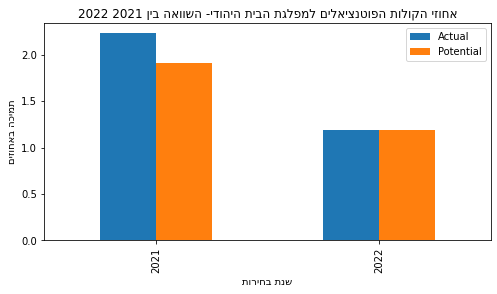

In [120]:
years=["2021","2022"]

opt_votes = [opt_votes21,opt_votes22]
actual_votes = [actual21,actual22]
a = pd.DataFrame()
a["Actual"] = actual_votes
a["Potential"] = opt_votes
a.plot.bar()
plt.xticks(np.arange(2), years)
plt.rcParams["figure.figsize"]=(8,4)
plt.xlabel(("שנת בחירות")[::-1])
plt.ylabel(("תמיכה באחוזים")[::-1])
plt.title(("אחוזי הקולות הפוטנציאלים למפלגת הבית היהודי- השוואה בין 1202 2202")[::-1])
plt.show()

#Question Number 4

##Question

 הציגו כיצד שכיחות ההצבעה למפלגה משתנה בין ישובים וקלפיות שונים: היכן מוקדי הכח
של המפלגה? איפה היא חלשה ואין לה מספיק מצביעים? יש להראות ניתוח לפי אשכול
חברתי כלכלי. ניתן להראות פרמטרים נוספים כגון גודל ישוב, יהודי/ערבי, חילוני/דתי, מדד
פריפריאליות, הכנסה לנפש, אי שויון וכו'. 

##Answer


In [121]:
#Calculating the total votes percent for Habait Hayehudi in Israel in 2022 election
PartyVotesPercent = VotesCity21.copy()
PartyVotesPercent = VotesCity22.iloc[:,6:].sum().div(VotesCity22.iloc[:,6:].sum().sum())
PartyVotesPercent = PartyVotesPercent.to_frame()
PartyVotesPercent.columns = ["Votes_percent"]

print("The Total Votes Percent for Habait Hyehudi is " + str(round((PartyVotesPercent["Votes_percent"].to_list()[2]*100), 3)) + " percents")

The Total Votes Percent for Habait Hyehudi is 1.192 percents


In [122]:
#The Total Votes Percent for Habait Hyehudi is 1.192 percents
# Before we will do our analysis processes we will remove the double envelopes

VotesCity22D = VotesCity22.copy()
VotesCity22D = VotesCity22D.loc[VotesCity22D.index != 'מעטפות חיצוניות'] # droping 'מעטפות חיצוניות'

In [123]:
#Merge the city dataset with the eskol calcali hevrati dataset
JoinDf22 = VotesCity22D.join(Eshkol_hevrati_calcali.set_index('set_code'), on='סמל ישוב')
JoinDf22 = JoinDf22.dropna() #removing all NA values to prevent from counting

JoinDf22A = JoinDf22.copy()
JoinDf22B = JoinDf22.copy()

In [124]:
sum_Votes22 = JoinDf22B.groupby(["eco_level"]).sum()
Party_sum_Votes22 = sum_Votes22["הבית היהודי"]
Party_percent_Votes22 = Party_sum_Votes22.div(Party_sum_Votes22.sum())
Party_percent_Votes22 = Party_percent_Votes22.to_frame()
Party_percent_Votes22.columns = ["Votes_percent"]

In [125]:
#Create a useful function in order to create the future simple bar plots
def create_simple_bar_plot_with_axhline(firstList, mainTitle, yValue, yTitle, firstLegend, secondLegend, xticksTitle, rotation, yLabel, xLabel):
  X = np.arange(len(firstList))
  ax = plt.subplot(111)
  plt.title(mainTitle[::-1], fontsize=17)
  plt.rcParams["figure.figsize"] = [8, 4]

  plt.axhline(y = yValue, color= 'teal', linewidth=2)
  plt.text(x= 0, y = yValue, s = yTitle, fontsize = 10)

  ax.bar(X, firstList, width=0.4, color='plum', align='center')
  ax.legend((firstLegend[::-1], secondLegend[::-1]), fontsize = 12)

  plt.xticks(X, xticksTitle, fontsize = 15, rotation = rotation)
  ax.set_ylabel(yLabel[::-1], fontsize = 12)
  ax.set_xlabel(xLabel[::-1], fontsize = 12)

  plt.show()

על מנת לאתר את מוקדי הכוח של מפלגת הבית היהודי בבחירות 2022, ואת מאפייניהם ברמת העיר נבצע מספר ניתוחים.

תחילה ננתח את אחוזי ההצבעה בערים השונות למפלגת הבית היהודי בחלוקה לאשכול חברתי-כלכלי, וזאת על מנת לאפיין מאילו מעמדות סוציו-אקונומיים מגיעים מירב תומכי מפלגת הבית היהודי.

על מנת לחשב זאת נחשב כמה קולות המפלגה קיבלה בכל אשכול ונחלק מספר זה בסך הקולות אותן המפלגה שלנו קיבלה.

In [126]:
print("Table 1")
Party_percent_Votes22

Table 1


,Votes_percent
eco_level,
1.0,0.000966
2.0,0.135114
3.0,0.064065
4.0,0.038222
5.0,0.100857
6.0,0.140951
7.0,0.234019
8.0,0.257709
9.0,0.027413


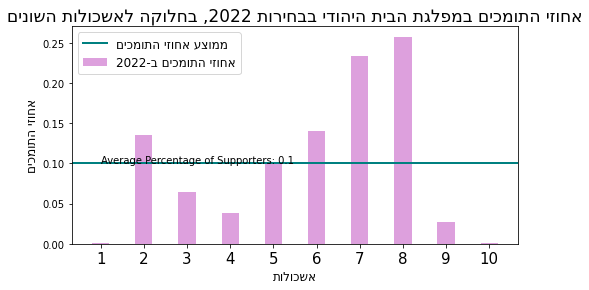

In [127]:
Listvotes_percent_22B = list(Party_percent_Votes22['Votes_percent'])

create_simple_bar_plot_with_axhline(Listvotes_percent_22B, "אחוזי התומכים במפלגת הבית היהודי בבחירות 2202, בחלוקה לאשכולות השונים", 
                                    st.mean(Listvotes_percent_22B), 'Average Percentage of Supporters: ' + str(st.mean(Listvotes_percent_22B)),
                                            "ממוצע אחוזי התומכים", "אחוזי התומכים ב-2202", list(Party_percent_Votes22.index.astype(int)), 0, 
                                            "אחוזי התומכים", "אשכולות")

גרף עמודות שיצרנו מתאר את אחוזי ההצבעה שהיו למפלגת הבית היהודי באשכולות השונים מתוך כלל המצביעים למפלגה בבחירות של שנת 2022.

ניכר כי שיעור ההצבעה למפלגת הבית היהודי בשנת 2022 לא כה אחידה, על פני כלל האשכולות החברתיים-כלכליים, הקולות מגיעים מאוכלוסיה מגוונת מבחינה סוציו אקונומית.

אולם, כן ניתן להבחין כי אחוזי ההצבעה הגבוהים ביותר מגיעים מאשכולות 8 ו-7. מאשכול מספר 8 מגיעים כ- 25.77% מתומכי המפלגה ומאשכול 7 מגיעים כ-23.4% מתומכי המפלגה, ובמקום השלישי אשכול מספר 6 (עם 14.095%), אחריו אשכול מספר 2 (עם כ-13.51%).

אחוזי התומכים הנמוך ביותר מגיע מאשכול מספר 10 ולאחריו מאשכול מספר 1.

In [128]:
Top10Cities = JoinDf22B['הבית היהודי'].div(JoinDf22B['הבית היהודי'].sum()).sort_values(ascending=False)
Top10Cities = Top10Cities.to_frame().iloc[:10,:]
Top10CitiesPercent = list(Top10Cities["הבית היהודי"])
Top10CitiesNames = list(Top10Cities.index)

ReverseTop10CitiesNames = []
for city in Top10CitiesNames:
  ReverseTop10CitiesNames.append(city[::-1])

In [129]:
Table2 = pd.DataFrame(Top10CitiesPercent, Top10CitiesNames,
                                              columns =['Votse Percent'])

כמו כן, כדי להציג תמונה ספציפית יותר של מוקדי הכוח של המפלגה, נציג כעת את 10 הערים בהן שיעור התמיכה במפלגת הבית היהודי הוא הגבוה ביותר.

על מנת לחשב זאת נחשב כמה קולות המפלגה קיבלה סך הכל בכל עיר ונחלק מספר זה בסך הקולות שהיא קיבלה במדינה.


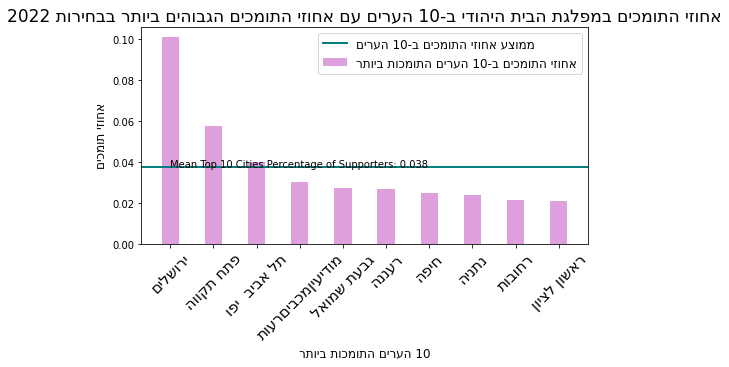

In [130]:
create_simple_bar_plot_with_axhline(Top10CitiesPercent, "אחוזי התומכים במפלגת הבית היהודי ב-01 הערים עם אחוזי התומכים הגבוהים ביותר בבחירות 2202", st.mean(Top10CitiesPercent),
                                    'Mean Top 10 Cities Percentage of Supporters: ' + str(round(st.mean(Top10CitiesPercent), 3)), "ממוצע אחוזי התומכים ב-01 הערים", 
                                    "אחוזי התומכים ב-01 הערים התומכות ביותר", ReverseTop10CitiesNames, 45, "אחוזי תומכים", "01 הערים התומכות ביותר")

מגרף עמודות זה אנו יכולים לראות כי רוב תומכי המפלגה מגיעים מירושלים, 10% מקרב התומכים מקורם משם.

לאחר מכן כ-5.8% מתומכי המפלגה מגיעים מפתח תקווה, כ-4% מהם מתל אביב וכ-3% מהם ממודיעין-מכבים-רעות.

כלל הערים מהן מגיעים רוב תומכי המפלגה הינם ערים גדולות, כאשר רוב הערים בעלות דירוג סוציו-אקונומי גבוה.

כמו כן, בהתאם לאופיה הדתי והימני של המפלגה ובהינתן הערים שהתקבלו כמוקדי הכוח העיקריים של המפלגה, ניתן להסיק שמוקדי הכוח של המפלגה בישובים עם אוכלוסיה דתית-לאומית כפי שהיינו מצפים לראות, ביניהן ירושלים, מודיעין, רעננה, גבעת שמואל ורחובות.

In [131]:
district_merge = VotesCity22D.copy()
district_merge = district_merge.reset_index()
district_merge = district_merge[["שם ישוב","סמל ישוב","הבית היהודי"]]

yishuvimData = district_merge.merge(citiesdata, on = "סמל ישוב")
sum_Votes22 = yishuvimData.groupby(["שם מחוז"]).sum()

In [132]:
TopDistrict = sum_Votes22["הבית היהודי"].div(sum_Votes22["הבית היהודי"].sum()).sort_values(ascending=False)
TopDistrict = TopDistrict.to_frame()
TopDistrictPercent = list(TopDistrict["הבית היהודי"])
TopDistrictNames = list(TopDistrict.index)

ReverseDistrictNames = []
for D in TopDistrictNames:
  ReverseDistrictNames.append(D[::-1])


כעת, על מנת לקבל הבנה היכן מוקדי הכוח הגיאוגרפיים של המפלגה ברמה ארצית כללית יותר, נבחן את חוזק המפלגה בקרב המחוזות השונים, ונבין מאילו מחוזות עיקר התומכים מגיע.

על מנת לחשב זאת נבצע איחוד של הנתונים בדבר הקולות בערים השונות, עם נתוני הלמ"ס משנת 2021 בדבר המחוז אליו שייכת כל עיר.
נחשב כמה קולות קיבלה מפלגת הבית היהודי בכל מחוז ונחלק מספר זה במספר התומכים הכללי שלה במדינה.

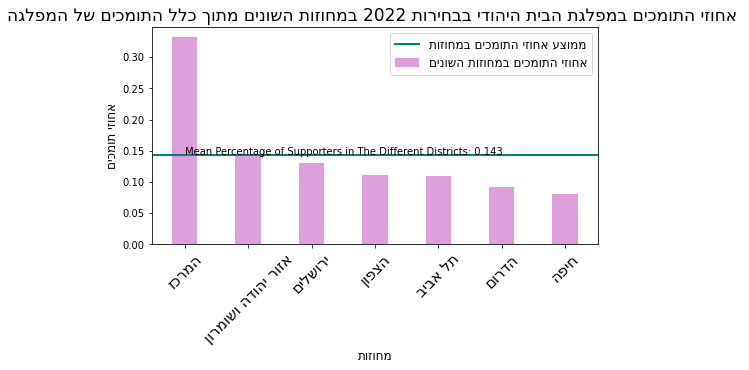

In [133]:
create_simple_bar_plot_with_axhline(TopDistrictPercent, " אחוזי התומכים במפלגת הבית היהודי בבחירות 2202 במחוזות השונים מתוך כלל התומכים של המפלגה", st.mean(TopDistrictPercent),
                                    'Mean Percentage of Supporters in The Different Districts: ' + str(round(st.mean(TopDistrictPercent), 3)), "ממוצע אחוזי התומכים במחוזות", 
                                    "אחוזי התומכים במחוזות השונים", ReverseDistrictNames, 45, "אחוזי תומכים", "מחוזות")

כפי שניתן לראות מירב התומכים במפלגה מגיע ממחוז המרכז (כ-33% מהתומכים), לאחר מכן ממחוז יהודה ושומרון (כ-14%), מחוז ירושלים שעומד במקום השלישי מכיל כ-13% מקרב תומכי המפלגה, מחוז הצפון במקום הרביעי עם כ-11.16% וצמוד אחריו מחוז תל אביב עם כ-11.01%.

In [134]:
religion_merge = VotesCity22D.copy()
religion_merge = religion_merge.reset_index()
religion_merge = religion_merge[["שם ישוב","סמל ישוב","הבית היהודי"]]

yishuvimData = religion_merge.merge(citiesdata, on = "סמל ישוב")
sum_Votes22 = yishuvimData.groupby(["דת יישוב"]).sum()

In [135]:
TopReligion = sum_Votes22["הבית היהודי"].div(sum_Votes22["הבית היהודי"].sum()).sort_values(ascending=False)
TopReligion = TopReligion.to_frame()
TopReligionPercent = list(TopReligion["הבית היהודי"])
TopReligionNames = ["יהודי", "מעורב", "דרוזי וערבי", "בדואי"]

ReverseReligionNames = []
for D in TopReligionNames:
  ReverseReligionNames.append(D[::-1])

כעת נרצה לבצע ניתוח נתונים בהתבסס על נתונים שאינם קשורים למידע גיאוגרפי או סוציו-אקונומי, ונרצה לאפיין את השיוך של מצביעי המפלגה לישוב בעל ציביון מגזרי מסויים: יהודי, ערבי, דרוזי או מעורב.

ניתוח זה מתבסס על קובץ הנתונים של הלמ"ס מ-2021, בדבר מגזר רוב תושבי העיר: ערבי ודרוזי או יהודי או בדואי או מעורב.

החישוב בוצע ע"י סכימת מספר הקולות שמפלגת הבית היהודי קיבלה בערים יהודיות, מעורבות, דרוזיות וערביות ובדאויות, חלקי מספר כלל התומכים של המפלגה.

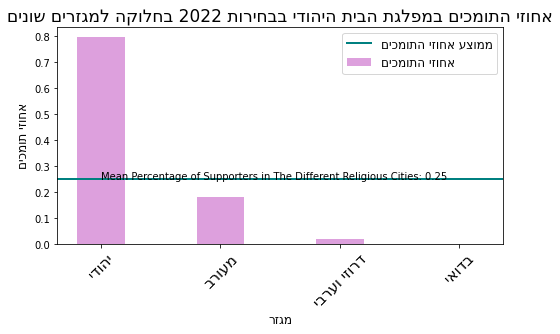

In [136]:
create_simple_bar_plot_with_axhline(TopReligionPercent, "אחוזי התומכים במפלגת הבית היהודי בבחירות 2202 בחלוקה למגזרים שונים", st.mean(TopReligionPercent),
                                    'Mean Percentage of Supporters in The Different Religious Cities: ' + str(round(st.mean(TopReligionPercent), 3)), "ממוצע אחוזי התומכים", 
                                    "אחוזי התומכים", ReverseReligionNames, 45, "אחוזי תומכים", "מגזר")

מגרף העמודות שלעיל ניתן לראות כי מירב הקולות הגיעו מקרב ישובים בעלי רוב אוכלוסיה יהודית.
79% מהבוחרים של הבית היהודי בשנת 2022 הינם מישובים בעלי רוב יהודי.
כ-18% מהבוחרים של הבית היהודי הגיעו מישובים בעלי אוכלוסיה מעורבת,
ורק כ-2.1% מהבוחרים הגיעו מישובים עם רוב דרוזי ועם רוב ערבי.
אחוז נמוך מאוד של בוחרים הגיע מישוב בדואי.
מכאן ניתן להסיק כי מירב הבוחרים יתכן והינו יהודי.


#Question Number 5

##Question:

הציגו את ההצבעה למפלגה בכל קלפי ב

plot-PCA

- יש להראות

plot-scatter

של הקלפיות במישור הנפרש ע"י שני הרכיבים העיקריים הראשונים, אך בנוסף הגודל או צבע של כל עיגול יציין את שכיחות ההצבעה למפלגה בקלפי, כך שניתן יהיה לראות ולתאר היכן שכיחות ההצבעה למפלגה גבוהה או נמוכה. 

- חזרו על ההצגה אך הפעם הגודל או הצבע של כל עיגול יציין את ההפרש באחוז ההצבעה בקלפי בין בחירות 2021 ל-2022.

##Answer:

בסעיף זה נציג את שכיחות ההצבעה בשנת 2022 למפלגת הבית היהודי בכל קלפי באמצעות שיטת
 
 PCA

In [137]:
#2022 Elections
#Organize the data set for the PCA process, the data with envelops

JustVotesBallot22 = VotesBallot22.copy()
JustVotesBallot22 = JustVotesBallot22.reset_index()
JustVotesBallot22 = JustVotesBallot22.set_index(["שם ישוב","סמל ישוב", "קלפי"])

JustVotesBallot22 = JustVotesBallot22.iloc[:,8:]

PCAJustVotesBallotNorm22 = JustVotesBallot22.div(JustVotesBallot22.sum(axis=1), axis=0)

pca = PCA(n_components=2)
principalComponents22 = pca.fit_transform(PCAJustVotesBallotNorm22)

In [138]:
#Creating basic PCA scatter plot function
def create_simple_scatter_plot_for_PCA(xLabel, yLabel, mainTitle, PCApoints1, PCApoints2, size, colors, colorSpectrum):
  fig, ax = plt.subplots(figsize=(8,6))
  ax.set_xlabel(xLabel[::-1], fontsize = 12)
  ax.set_ylabel(yLabel[::-1], fontsize = 12)
  ax.set_title(mainTitle[::-1], fontsize = 15)

  #plotting
  PCAplot = ax.scatter(PCApoints1, PCApoints2, s = size, c = colors, cmap = colorSpectrum)
  plt.colorbar(PCAplot)
  plt.show()

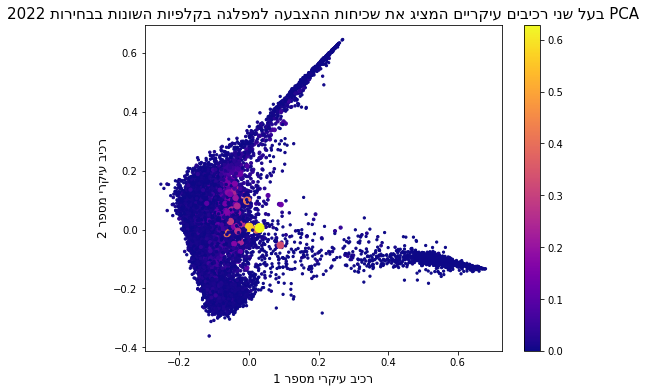

In [139]:
colors = VotesBallot22["הבית היהודי"].div(VotesBallot22['כשרים'])

create_simple_scatter_plot_for_PCA("רכיב עיקרי מספר 1", "רכיב עיקרי מספר 2", "ACP בעל שני רכיבים עיקריים המציג את שכיחות ההצבעה למפלגה בקלפיות השונות בבחירות 2202", 
                                   principalComponents22[:, 0], principalComponents22[:, 1],
                                   (colors*120)+5, colors, "plasma")

הגרף מציג את שכיחות ההצבעה לבית היהודי ב2022 באמצעות גרף פיזור. כל עיגול מייצג קלפי, גודלו וצבעו של העיגול מייצג את שכיחות ההצבעה למפלגת הבית היהודי באותה קלפי. צבע בהיר יותר (צהוב) ועיגול עם רדיוס גדול יותר מעידים על שכיחות הצבעה גבוהה יותר למפלגה 

ניכר כי אין מספר רב של קלפיות ששכיחות ההצבעה בהן למפלגת הבית היהודי הייתה גבוהה למדיי, ניתן להבחין כי היו כ-5 קלפיות בעלות מעל 30% הצבעה למפלגה המדוברת (קאורדינטות שצבען צהוב וכתום), מיקומן של 5 הקלפיות נמצא באותו אזור מרכזי בגרף. בנוסף, נבחין כי יש קלפיות רבות המרוכזות באזור העליון-מרכזי של הגרף, בהן אחוזי ההצבעה למפלגה המדוברת עמד על בין 10% ל-30%.

הנתון שמשתקף מהגרף בדבר כך שאין הרבה קלפיות אשר הצביעו באחוזים גבוהים למפלגת הבית היהודי עולה בהלימה לכך שבראייה כלל ארצית המפלגה לא זכתה לאחוזי הצבעה גבוהים כלל ואף לא עברה את אחוז החסימה.

בנוסף, כאשר אנו רוצים לאפיין את אופי האוכלוסיה מהגרף 
אנו יכולים להבחין כי מירב הקלפיות בהן אחוזי ההצבעה למפלגה עמדו על 10%-30%, מצויות בקירוב האחת לשניה בגרף. מכאן ניתן להסיק כי מרבית מצביעי המפלגה שייכים לריכוז אוכלוסייה יחסית אחיד, אך משילוב המידע שיש לנו מהגרפים בסעיף ד', ניתן לראות כי ישנו מיעוט מצביעים בעלי מאפיינים השונים מהאוכלוסיה הדתית לאומית, כדוגמת יהודים חילונים ודרוזים. הדבר הזה משתקף בכך שיש כ-5 קאורדינטות בעלות צבעים וגדלים שונים מהקאורדינטות בסביבתן.

נבחן קלפיות חריגות בסעיף ט'.



In [140]:
VotesBallot21E = FixedVotesBallot21.copy()
VotesBallot21E = VotesBallot21E.loc[VotesBallot21E.index != "מעטפות חיצוניות"]

VotesBallot22E = VotesBallot22.copy()
VotesBallot22E = VotesBallot22E.loc[VotesBallot22E.index != "מעטפות חיצוניות"]

In [141]:
#Merge data for the common ballots 

CommonBallots = pd.merge(VotesBallot21E, VotesBallot22E, how = "inner", on = ["שם ישוב","סמל ישוב", "קלפי"], suffixes=('_21', '_22'))
CommonBallots = CommonBallots.dropna() #removing all NA values to prevent from counting

#Using reset_index, inplace=True
CommonBallots.reset_index(inplace=True)
CommonBallotsFinal = CommonBallots.set_index(["שם ישוב","סמל ישוב", "קלפי"])

In [142]:
#Separate the data
VotesBallot21E = CommonBallotsFinal.iloc[:,:47]
VotesBallot21E = VotesBallot21E.set_index(CommonBallotsFinal.index)

VotesBallot22E = CommonBallots.iloc[:,50:]
VotesBallot22E = VotesBallot22E.set_index(CommonBallotsFinal.index)

In [143]:
#Normalize the data - Final data for question 1, sub question a
# שכיחויות הצבעה למפלגות בקלפיות משותפות 2021
DfParties21 = VotesBallot21E.iloc[:,8:].div(VotesBallot21E.iloc[:,8:].sum(axis=1), axis=0)
DfParties21.rename(columns = {'הבית היהודי_21':'הבית היהודי'}, inplace = True)

# שכיחויות הצבעה למפלגות בקלפיות משותפות 2022
DfParties22 = VotesBallot22E.iloc[:,8:].div(VotesBallot22E.iloc[:,8:].sum(axis=1), axis=0)
DfParties22.rename(columns = {'הבית היהודי_22':'הבית היהודי'}, inplace = True)

In [144]:
#Create a data frame for the colors
colors = DfParties22["הבית היהודי"] - DfParties21["הבית היהודי"]
colors = pd.DataFrame(colors)
colors.columns = ["ColorNumber"]
colors = colors.reset_index()

In [145]:
principalDf22 = pd.DataFrame(data = principalComponents22, columns = ['principal component 1', 'principal component 2'])
principalDf22.index = JustVotesBallot22.index
principalDf22 = principalDf22.reset_index()

In [146]:
CommonBallots = pd.merge(principalDf22, colors, how = "inner", on = ["שם ישוב","סמל ישוב", "קלפי"])
CommonBallots = CommonBallots.dropna() #removing all NA values to prevent from counting
CommonBallots = CommonBallots.set_index(["שם ישוב","סמל ישוב", "קלפי"])

הגרף הבא ממחיש את השינוי באחוזי ההצבעה לבית היהודי בקלפיות השונות בין מערכת הבחירות של 2021 ו-2022 ,הגרף הבא ממחיש את הנתונים הללו 
כאשר הגודל והצבע של העיגולים מציינים את ההפרש באחוז ההצבעה בקלפי בין שתי מערכות הבחירות 
הנתונות.

הפרש חיובי מצביע על עליה באחוזי ההצבעה בין שתי מערכות הבחירות והפרש שלילי מעיד על ירידה באחוזי ההצבעה בין שתי מערכות הבחירות.

הפרש חיובי מתבטא בצבעים בהירים ובגודל עיגול של קאורדינטה גדול יותר.

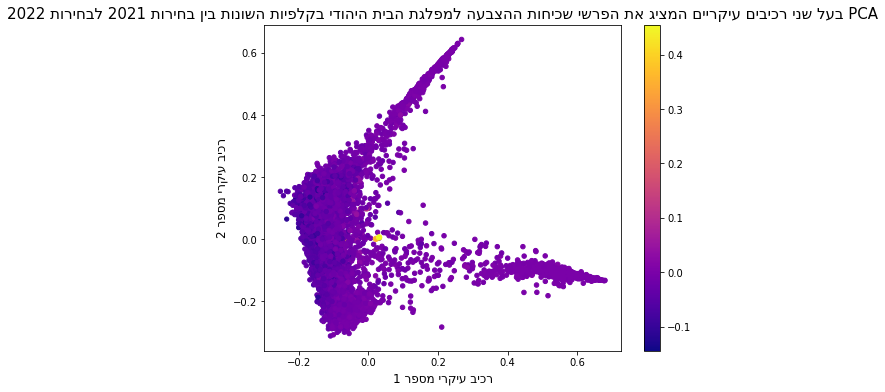

In [147]:
extra = math.ceil(abs(min(CommonBallots["ColorNumber"])))

create_simple_scatter_plot_for_PCA("רכיב עיקרי מספר 1", "רכיב עיקרי מספר 2", "ACP בעל שני רכיבים עיקריים המציג את הפרשי שכיחות ההצבעה למפלגת הבית היהודי בקלפיות השונות בין בחירות 1202 לבחירות 2202", 
                                   CommonBallots["principal component 1"], CommonBallots["principal component 2"],
                                   (CommonBallots["ColorNumber"]+extra)*20, CommonBallots["ColorNumber"], "plasma")

מבחינת קלפיות שבהן אחוז ההצבעה למפלגה עלה ניתן לראות כי אין הרבה נקודות כאלו. נקודות אלו מצויות במרכז הגרף, ואילו הנקודות בשולי הגרף בצידו השמאלי מייצגות קלפיות בהן חלה ירידה באחוזי ההצבעה, שכן צבען כהה יותר. כמו כן, נשים לב כי ישנן הרבה נקודות שצבען סגול המייצגות קלפיות בהן לא היה שינוי בשנתיים הללו. 
 הנתון כי אין הרבה קלפיות בהן חלה עליה רבה בשיעור ההצבעה ואף קיימות קלפיות רבות יותר בהן חלה ירידה, עולה בקנה אחד עם הנתון של אחוזי ההצבעה הנמוכים להם מפלגת הבית היהודי זכו.

אנחנו יכולים לשים לב כי ישנן 2 נקודות שצבען בהיר המצויות במרכז הגרף, משמע חלה עליה באחוזי ההצבעה בקלפיות אלו. מדובר ב-2 קלפיות שאכן גם ראינו בגרף הראשון בסעיף זה בהן אחוזי ההצבעה למפלגה גבוהים בשנת 2022.
יתכן שמדובר בקלפיות חריגות, על מנת לאפיין ולזהות בצורה ישירה את הקלפיות בהן חל שינוי גדול ביותר נבצע בדיקה זו במעמד סעיף ט', בו נבדוק קלפיות חריגות בהקשר הצבעה למפלגת הבית היהודי.

#Question Number 6



##Question

הציגו את מעבר הקולות של מצביעי המפלגה בבחירות הקודמות למפלגות אחרות בבחירות
2022

לאילו מפלגות עברו הכי הרבה ממצביעי
המפלגה בבחירות הקודמות?

כולל כאלו שלא הצביעו ב-2022

##Answer

In [148]:
#Rearange 2021 election data:

names_13_21 = ['הליכוד', 'יש עתיד', 'שס', 'כחול לבן', 'יהדות התורה', 'עבודה', 'ימינה',
       'ישראל ביתנו', 'הרשימה המשותפת', 'הציונות הדתית', 'תקוה חדשה', 'מרצ',
       'הרשימה הערבית המאוחדת']

cols_21=np.copy(names_13_21).tolist()
cols_21.extend(['בזב','כשרים','קלפי' ,'סמל ישוב'])

#We will use the fixed data for 2021 election
VotesBallot21F = VotesBallot21.copy()
#We will drop double envelops
VotesBallot21F = VotesBallot21F.drop('מעטפות חיצוניות', axis=0)

df_2021_ballot = VotesBallot21F[cols_21].reset_index()

In [149]:
#Rearange 2022 election data:

names_13_22 = ['הליכוד', 'יש עתיד','שס',  'המחנה הממלכתי',
       'יהדות התורה', 'עבודה','הבית היהודי','ישראל ביתנו', 'חדש','הציונות הדתית', 'בלד',  'מרצ', 'הרשימה הערבית המאוחדת']


cols_22=np.copy(names_13_22).tolist()
cols_22.extend(['בזב','כשרים','קלפי' ,'סמל ישוב'])

VotesBallot22F = VotesBallot22.copy()
#We will drop double envelops
VotesBallot22F = VotesBallot22F.drop('מעטפות חיצוניות', axis=0) 

df_2022_ballot = VotesBallot22F[cols_22].reset_index()

In [150]:
#Merge the 2 elections data

ballot_match = df_2021_ballot.set_index(['שם ישוב','קלפי', 'סמל ישוב']).join(df_2022_ballot.set_index(['שם ישוב','קלפי', 'סמל ישוב']), lsuffix = '-2021').dropna()

ballot_2022 = ballot_match[ballot_match.columns[15:]]
ballot_2021 = ballot_match[ballot_match.columns[0:15]]

In [151]:
#Rename the 2021 election columns' names
cols_21=names_13_21
cols_21.extend(['בזב','כשרים'])

ballot_2021.columns = cols_21

In [152]:
#Create function that can create heatmap of the transition matrix

def corr_heat_map(M, parties_2022, parties_2021, mainTitle):
    n_22 = len(parties_2022)
    n_21 = len(parties_2021)

    fig, ax = plt.subplots(figsize = (10,10))
    im = ax.imshow(M, cmap=plt.get_cmap('viridis'))

    ax.set_title("Changes in voting preferences - M Based on " + mainTitle)
    ax.set_xticks(np.arange(n_22))
    ax.set_yticks(np.arange(n_21))
    # And to label them with the relevant parties names
    ax.set_xticklabels([n[::-1] for n in parties_2022], rotation=90)
    ax.set_yticklabels([n[::-1] for n in parties_2021])
    ax.set_xlabel("2022")
    ax.set_ylabel("2021")

    # Loop over data dimensions to create text annotations.
    for i in range(n_21):
        for j in range(n_22):
            text = ax.text(j, i, round(M[i, j], 3), ha="center", va="center", color="w")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('votes probability', rotation=-90, va="bottom")

    plt.show()

In [153]:
ballot_2021['לא הצביעו'] = ballot_2021['בזב'] - ballot_2021['כשרים']
ballot_2022['לא הצביעו'] = ballot_2022['בזב'] - ballot_2022['כשרים']

names_13_21_nv = np.copy(names_13_21).tolist()
names_13_21_nv.extend(['לא הצביעו'])

names_13_22_nv = np.copy(names_13_22).tolist()
names_13_22_nv.extend(['לא הצביעו'])

names_13_21_nv.remove("בזב")
names_13_21_nv.remove("כשרים")

#creating matrix of votes
n_a_nv = ballot_2021[names_13_21_nv].values
n_b_nv = ballot_2022[names_13_22_nv].values

# Calculating M - מעוגל
M_nv_a = np.linalg.pinv(n_a_nv.T @ n_a_nv) @n_a_nv.T @ n_b_nv

# Avoiding small numbers
M_nv = pd.DataFrame(np.where(M_nv_a < 0.005, 0, M_nv_a))
#M_nv = pd.DataFrame(M_nv_a)
# Convert the matrix ti be stochastic matrix, the rows sum is 1.
M_nv = M_nv.div(M_nv.sum(axis = 1), 0)

בסעיף זה נשתמש במטריצת המעבר על בסיס שיטת אמידה של הריבועים הפחותים

OLS

נשתמש במטריצה זו על מנת לאמוד מהם סיכויי המעבר של בוחרי מפלגת ימינה בבחירות 2021, למפלגות אחרות בבחירות של שנת 2022. ומהם סיכויי המעבר של בוחרים במפלגות שונות בשנת 2021, למפלגת הבית היהודי ב-2022.

תיקון הקולות שביצענו בסעיפים ג', ד' ו-ט' התבסס על מטריצת מעבר זו.

השתמשנו במטריצת מעבר המבוססת על שיטת אמידה של
הריבועים הפחותים ולא של הריבועים הפחותים האי שליליים

(NNLS)

וזו ממספר סיבות, תחילה חישבנו את ממוצע הטעויות הריבועיות הממוצעות בעבור כל שיטה וראינו כי הממוצע של שיטת הריבועים הפחותים נמוכה יותר מהממוצע של שיטת הריבועים הפחותים האי שליליים.
סיבה שנייה נובעת מכך ששיטת הריבועים הפחותים לא כוללת בתוכה אילוצים אשר עשויים להשפיע ולהטות את התוצאות שלנו.

על מנת לייצר את מטריצת המעבר השתמשנו ברגרסיה ליניארית של הריבועים הפחותים.
לאחר מכן, איפסנו מספרים הקטנים מ-0.005 ונרמלנו את שורות המטריצה על מנת שהמטריצה תהיה מטריצה סטוכסטית.
יצרנו את מטריצת המעבר בהתבסס על נתוני המקור של הבחירות של שנת 2021 ושל שנת 2022.
יצרנו את מטריצה זו בלי לבצע תיקונים של ההצבעות בהתאם לאיחוד / פיצול הקולות, וזאת לאור כך שרצינו לבחון את האומדים להסתברויות המעבר בין המפלגות הקיימות בין בחירות 2021, לבין בחירות 2022, ועל בסיס מטריצת המעבר שנוצרה לבצע תיקונים עבור נתוני 2021 בסעיפים הנדרשים. להלן מטריצת המעבר:

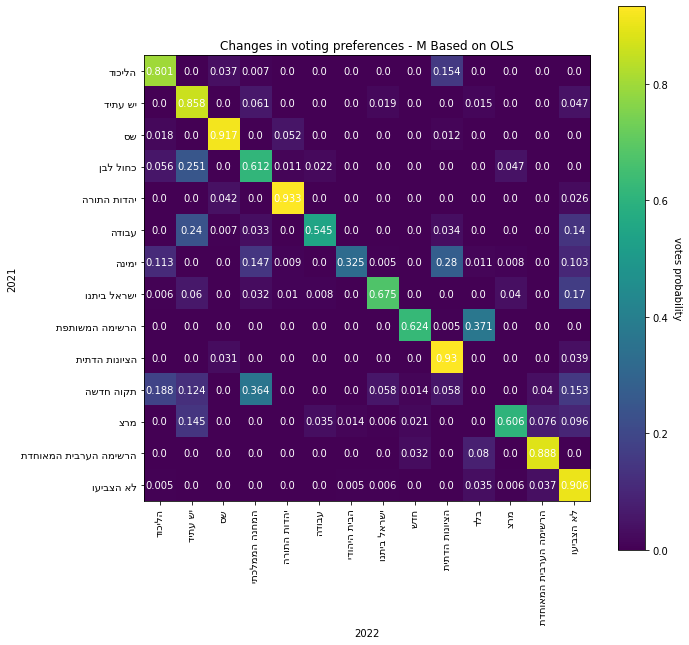

In [154]:
corr_heat_map(M_nv.values, names_13_22_nv, names_13_21_nv, "OLS")

In [155]:
# Create the transition matrix

M_nv.columns = [n for n in names_13_22_nv]
M_nv.index = [n for n in names_13_21_nv]

In [156]:
xticks1 = [n[::-1] for n in names_13_22_nv]
LeftHabaitHayehudi1 = list(M_nv.loc["ימינה"])

In [157]:
#Create an helpful function in order to create the 2 bar plots in questions number 6 and 7
def create_simple_bar_plot(firstList, mainTitle, currentxticks, rotation, yLabel, xLabel):
  X = np.arange(len(firstList))
  ax = plt.subplot(111)
  plt.title(mainTitle[::-1], fontsize=17)
  plt.rcParams["figure.figsize"] = [8, 6]

  ax.bar(X, firstList, width=0.6, color='plum', align='center')

  plt.xticks(X, currentxticks, fontsize = 15, rotation = rotation)
  ax.set_ylabel(yLabel[::-1], fontsize = 12)
  ax.set_xlabel(xLabel[::-1], fontsize = 12)

  plt.show()

In [158]:
def create_double_bar_plot(firstList, secondList, mainTitle, legend1, legend2, currentxticks, rotation, yLabel, xLabel):

  width = 0.2
  X = np.arange(len(firstList))
  ax = plt.subplot(111)
  plt.title(mainTitle[::-1], fontsize=17)
  plt.rcParams["figure.figsize"] = [8,6]

  ax.bar(X-width, firstList, width=0.2, color='plum', align='center')
  ax.bar(X, secondList, width=0.2, color='cyan', align='center')

  ax.legend((legend1[::-1], legend2[::-1]), fontsize = 15)

  plt.xticks(X, currentxticks, fontsize = 15, rotation = rotation)
  ax.set_ylabel(yLabel[::-1], fontsize = 12)
  ax.set_xlabel(xLabel[::-1], fontsize = 12)

  plt.figure(figsize=(20, 3))

  plt.show()

In [159]:
#create_simple_bar_plot(LeftHabaitHayehudi1, "מעבר הקולות של מצביעי מפלגת הבית היהודי בבחירות 1202 למפלגות אחרות בבחירות 2202", xticks1, 90, "אחוזי הצבעה", "המפלגות אליהן עברו הקולות")

In [160]:
#Nnls שיטת

#names_13_21_nv.remove("בזב")
#names_13_21_nv.remove("כשרים")

#creating matrix of votes
n_a_nv = ballot_2021[names_13_21_nv].values
n_b_nv = ballot_2022[names_13_22_nv].values

from scipy.optimize import nnls
# empty M matrix
M_c = np.zeros((n_a_nv.shape[1], n_b_nv.shape[1]))

# calculating the nnls regression
for i in range(n_b_nv.shape[1]):
  sol, res = nnls(n_a_nv, n_b_nv[:, i])
  M_c[:,i] = sol

# applying constraints:
M_c = pd.DataFrame(np.where(M_c < 0.005, 0, M_c))
# Convert the matrix ti be stochastic matrix, the rows sum is 1.
M_c =M_c.div(M_c.sum(axis = 1), 0)

In [161]:
#corr_heat_map(np.array(M_c), names_13_22_nv, names_13_21_nv, "NNLS")

In [162]:
M_c.columns = [n for n in names_13_22_nv]
M_c.index = [n for n in names_13_21_nv]

In [163]:
LeftHabaitHayehudi2 = list(M_c.loc["ימינה"])

In [164]:
#create_double_bar_plot(LeftHabaitHayehudi1, LeftHabaitHayehudi2, "מעבר הקולות של מצביעי מפלגת הבית היהודי בבחירות 1202 למפלגות אחרות בבחירות 2202 בהתאם לשתי שיטות אמידה", "שיטת הריבועים הפחותים", "שיטת slnN", xticks1, 90, "אחוזי הצבעה", "המפלגות אליהן עברו הקולות")

In [165]:
zero_data1 = np.zeros(shape=(len(range(14)),len(range(14))))
M1 = pd.DataFrame(zero_data1, columns=[n for n in names_13_22_nv], index=[n for n in names_13_21_nv])

M1.loc[["ימינה"]] = LeftHabaitHayehudi1

In [166]:
#!pip install kaleido

In [167]:
import plotly.graph_objects as go

labels=[n for n in names_13_21_nv]
labels.extend([n for n in names_13_22_nv])

a=[[i]*14 for i in range(14)]

sources=[]

[sources.extend(i) for i in a]

b=[np.arange(14,28).tolist()]*14

targets=[]

[targets.extend(i) for i in b]

fig = go.Figure(data=[go.Sankey(
    node = dict(
      label = labels,
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = targets,
      value = np.array(M1).flatten()
  ))])

fig.update_layout(title_text=" OLS הקולות שעברו ממפלגת ימינה בשנת 2021, לפי", font_size=10)
fig.show()

בדיאגרמת סנקי שיצרנו לעיל, ניתן לראות את מעבר הקולות שהיה מקהל הבוחרים במפלגת ימינה בבחירות 2021, למפלגות השונות בבחירות 2022, בפרט למפלגת הבית היהודי זאת בהתאם לשיטת האמידה של הריבועים הפחותים לפי נורמת פרובינוס.
מהדיאגרמה ניתן לראות כי בסיכוי של 0.325 התקיים מעבר של בוחרי מפלגת ימינה בבחירות 2021, למפלגת הבית היהודי ב-2022.
עוד עולה כי בסיכוי 0.28 התקיים מעבר בוחרים מימינה לציונות הדתית.
בנוסף, ניתן לראות כי בסיכוי 0.147 היה מעבר קולות מימינה למחנה הממלכתי.
כמו כן, בהסתברות 0.113 התרחש מעבר קולות בוחרים מימינה למפלגת הליכוד. קולות נוספים עברו מימינה ליהדות התורה, בלד, מרצ, ישראל ביתנו אך בסיכויים נמוכים יותר.
נשים לב כי בסיכוי של 0.103 אנשים שהצביעו לימינה ב-2021, לא הצביעו בבחירות 2022.
לסיכום, שתי המפלגות אליהן עברו הקולות הרבים ביותר מימינה הן: הבית היהודי במקום הראשון, והציונות הדתית במקום השני.

#Question Number 7

##Question

הציגו את מעבר הקולות החדשים למפלגה, כלומר מצביעים שעברו אל המפלגה בבחירות 2022, ממפלגות אחרות בבחירות הקודמות, כולל כאלו שלא הצביעו בהןׁׁׁׂׂ,
מאילו מפלגות עברו הכי הרבה מצביעים למפלגתכם?

##Answer

In [168]:
xticks2 = [n[::-1] for n in names_13_21_nv]
JoinHabaitHayehudi1 = list(M_nv["הבית היהודי"])
JoinHabaitHayehudi2 = list(M_c["הבית היהודי"])

In [169]:
#create_simple_bar_plot(JoinHabaitHayehudi1, "מעבר הקולות החדשים למפלגת הבית היהודי בבחירות 2202 ממפלגות אחרות בבחירות 1202", xticks2, 90, "אחוזי הצבעה", "המפלגות מהן עברו הקולות")

In [170]:
#create_double_bar_plot(JoinHabaitHayehudi1, JoinHabaitHayehudi2, "מעבר הקולות החדשים למפלגת הבית היהודי בבחירות 2202 ממפלגות אחרות בבחירות 1202 בהתאם לשתי שיטות אמידה", "שיטת הריבועים הפחותים", "שיטת slnN", xticks2, 90, "אחוזי הצבעה", "המפלגות מהן עברו הקולות")

In [171]:
zero_data2 = np.zeros(shape=(len(range(14)),len(range(14))))
M2 = pd.DataFrame(zero_data2, columns=[n for n in names_13_22_nv], index=[n for n in names_13_22_nv])

M2["הבית היהודי"] = JoinHabaitHayehudi1

In [172]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      label = labels,
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = targets,
      value = np.array(M2).flatten()
  ))])

fig.update_layout(title_text=" OLS הקולות שעברו למפלגת הבית היהודי בשנת 2022, לפי", font_size=10)
fig.show()

מדיאגרמה זו ניתן לראות את הסתברות מעבר הקולות שעברו ממפלגות שונות
 בבחירות 2021 למפלגת הבית היהודי בבחירות 2022 על פי שיטת הריבועים הפחותים.
בשיטת הריבועים הפחותים קולות עברו בהסתברות של 0.325 מימינה לבית היהודי, ממפלגת מרצ לבית היהודי (בהסתברות של כ-0.014)
וגם מקרב אנשים שלא הצביעו בשנת 2021 (בהסתברות של כ-0.005).
לסיכום, מעבר הקולות הגדול ביותר התקיים ממפלגת ימינה לבית היהודי.


#Question Number 8

##Question

אילו מעברי קולות מהמפלגה/אליה הם סגיניפיקנטיים? כמה טובות תחזיות מודל מעברי
הקולות עבור המפלגה ביחס למפלגות אחרות? 

##Answer

In [173]:
def show_mat_heat_map(M, parties_2022, parties_2021, title, bool = False):
    n_22 = len(parties_2022)
    n_21 = len(parties_2021)

    fig, ax = plt.subplots(figsize = (10,10))
    im = ax.imshow(M, cmap=plt.get_cmap('viridis'))

    ax.set_title(title)
    ax.set_xticks(np.arange(n_22))
    ax.set_yticks(np.arange(n_21))
    # And to label them with the relevant parties names
    ax.set_xticklabels([n[::-1] for n in parties_2022], rotation=90)
    ax.set_yticklabels([n[::-1] for n in parties_2021])
    ax.set_xlabel("2022")
    ax.set_ylabel("2021")

    # Loop over data dimensions to create text annotations.
    if bool :
        for i in range(n_21):
            for j in range(n_22):
                text = ax.text(j, i, round(M[i, j], 3), ha="center", va="center", color="w")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('votes probability', rotation=-90, va="bottom")

    plt.show()

בסעיף זה נמצא אילו מהמעברים האופציונאליים שאמדנו בסעיפים ו' ו-ז' מובהקים. על מנת לענות על שאלה זו, חישבנו ערכי

P-value

השערת האפס שלנו היא שלא התרחש מעבר קולות ממפלגה מסויימת לאחרת.

נדחה את השערת האפס אם ערך

ה-P-value

שלנו קטן מ-0.001.
אם נדחה את השערת האפס - משמע התקיים מעבר קולות בין אותן שתי מפלגות.

נבדוק את ההשערה באמצעות מבחן חד צדדי

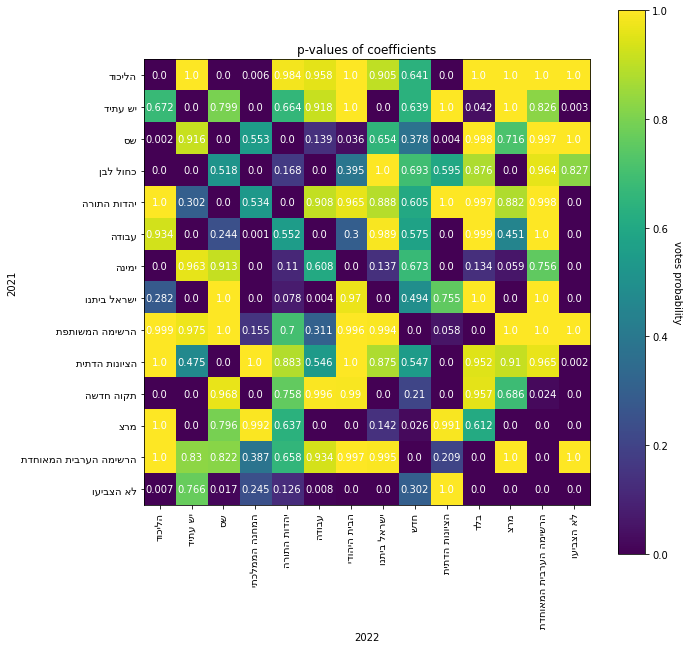

In [174]:
# Creating matrix of votes
n_a = n_a_nv
n_b = n_b_nv

mse = np.mean((n_a @ M_nv_a - n_b)**2, axis = 0)
std_b = np.array([np.sqrt(i*(np.linalg.inv(n_a.T@n_a)).diagonal()) for i in mse])

t_statistic = np.array([M_nv_a[i,:]/std_b[:,i] for i in range(14)])
p_val = stats.t.cdf(-t_statistic, n_a.shape[0]-n_b.shape[1]-1) # One-sided test. Deg. freedom: n - p
  
#show_mat_heat_map(M_nv_a, names_13_22_nv, names_13_21_nv, 'Estimated coefficients', True)
#show_mat_heat_map(std_b.T, names_13_22_nv, names_13_21_nv, 'Estimated std of coefficients',  True)
#show_mat_heat_map(t_statistic, names_13_22_nv, names_13_21_nv, 't-statistics of coefficients', True)
show_mat_heat_map((p_val), names_13_22_nv, names_13_21_nv, 'p-values of coefficients', True)  # One sided test!
# show_mat_heat_map((p_val<0.001), names_13_22_nv, names_13_21_nv, 'p-values < 0.001')

מעברי הקולות שנמצאו מובהקים מימינה 2021 למפלגות אחרות ב-2022 הינם::
מימינה לליכוד, מימינה למחנה הממלכתי, מימינה לבית היהודי, מימינה לציונות הדתית ומימינה ללא הצביעו.

בנוסף, נמצאו מעברי קולות נוספים ממפלגות אחרות ב-2021 למפלגת הבית היהודי ב-2022:
מימינה לבית היהודי, ממרצ לבית היהודי, ומאשר אלו שלא הצביעו.

In [175]:
#Rearange 2021 election data:

names_13_21 = ['הליכוד', 'יש עתיד', 'שס', 'כחול לבן', 'יהדות התורה', 'עבודה', 'ימינה',
       'ישראל ביתנו', 'הרשימה המשותפת', 'הציונות הדתית', 'תקוה חדשה', 'מרצ',
       'הרשימה הערבית המאוחדת']

In [176]:
#Rearange 2022 election data:

names_13_22 = ['הליכוד', 'יש עתיד','שס',  'המחנה הממלכתי',
       'יהדות התורה', 'עבודה','הבית היהודי','ישראל ביתנו', 'חדש','הציונות הדתית', 'בלד',  'מרצ', 'הרשימה הערבית המאוחדת']

In [177]:
# Creating matrix of votes
n_a = ballot_2021[names_13_21].values
n_b = ballot_2022[names_13_22].values

In [178]:
# Fit the M matrix 
def fit_M(n_a, n_b, M_nnls=False, normalize=True):
    if M_nnls:
      M_hat = np.zeros((n_b.shape[1], n_a.shape[1]))
      for j in range(n_b.shape[1]):
        M_hat[j,:], r2 = nnls(n_a, n_b[:,j])
      M_hat = M_hat.T
    else: # fit_method != 'nnls'
      # Fit M on the bootstrap sample
      M_hat = np.linalg.inv(n_a.T @ n_a) @ n_a.T @ n_b
    
    if normalize:
      # applying constraints
      M_hat = np.where(M_hat < 0.005, 0, M_hat)
#      M_hat = M_hat.div(M_hat.sum(axis = 1), 0)
      M_hat /=  M_hat.sum(axis=1)[:,np.newaxis]  
    
    return M_hat

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
# Creating train data and test data (split randomly 80% vs. 20%):
train_a, test_a, train_b, test_b = train_test_split(n_a, n_b, train_size = 0.8, random_state = 123)

In [181]:
M_1 = fit_M(train_a, train_b, False, True)

In [182]:
# Calculating and plotting residuals:
mse_123 = pd.DataFrame(np.zeros([13, 1]), columns=["OLS"])
res_1 = (test_a @ M_1 - test_b)**2
mse_123["OLS"] = np.mean(res_1, axis = 0)

כעת נחשב את הטעויות הריבועיות הממוצעות עבור כל מפלגה, וזאת על מנת להעריך כמה תחזיות המודל של מעברי הקולות הקשורים למפלגות ימינה והבית היהודי היו טובות, ביחס לשאר המפלגות.

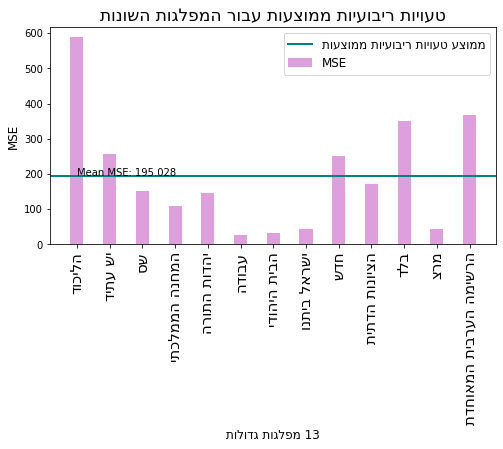

In [183]:
create_simple_bar_plot_with_axhline(mse_123["OLS"].to_list(), "טעויות ריבועיות ממוצעות עבור המפלגות השונות", st.mean(mse_123["OLS"].to_list()),
                                    'Mean MSE: ' + str(round(st.mean(mse_123["OLS"].to_list()), 3)), "ממוצע טעויות ריבועיות ממוצעות", 
                                    "ESM", [name[::-1] for name in list(names_13_22)], 90, "ESM", "31 מפלגות גדולות")

חושבה עבור כל אחת מ13 המפלגות הטעות הריבועית הממוצעת - ניתן לראות כי עבור הבית היהודי הטעות הריבועית הממוצעת קטנה מממוצע הטעויות הריבועיות הממוצעות, ואף ערכה היא מהקטנות ביחס לשאר המפלגות. דבר זה מעיד על חיזוי טוב שקיבלנו בעבור מפלגתנו, ביחס לשאר המפלגות, אשר מובא באמצעות מודל מעברי הקולות. 

#Question Number 9

##Question

הציגו קלפיות הנראות לכם חשודות, והסבירו כיצד הן עשויות להשפיע על ההצבעה למפלגה
 האם יש אזורים/קלפיות בהם המפלגה קיבלה מספר קולות גבוה/נמוך במיוחד או שינוי גדול)
במיוחד באופן חשוד)?

##Answer

בסעיף זה נציג קלפיות חשודות וננתח כיצד הן עשויות להשפיע על ההצבעה למפלגת הבית היהודי. לשם כך, נערוך שתי בדיקות של חריגויות:

בבדיקה הראשונה נבחן מהן 10 הקלפיות בהן נמצא סכום ההפרשים הריבועיים הגדולים ביותר באחוזי ההצבעה למפלגות השונות, בין שנת 2021 לבין שנת 2022.
בדיקה זו תציף קלפיות שיתכן שהתרחשו בהם אירועים חריגים ברמה של כלל הקלפי, כלומר שינויים חריגים באחוזי ההצבעה לכלל המפלגות באותה הקלפי, בפרט יתכן שגם למפלגת הבית היהודי.

ובבדיקה השנייה נבחן מהן 10 הקלפיות בהן חל השינוי הריבועי הגדול ביותר באחוזי ההצבעה למפלגת הבית היהודי.
המטרה של בדיקה זו היא לבחון האם היה אירוע חריג בקלפיות השונות שמטרתו להשפיע בצורה ממוקדת על אחוזי התמיכה שמפלגת הבית היהודי יקבלו.

הסיבה שאנו מבצעים את 2 הבדיקות הללו היא כדי להבין אם יש קלפיות בהן חלו שינויים רבים וכלליים בבחירות של האוכלוסיה הבוחרת, שבין היתר גם בהן חל שינוי דרסטי באחוזי ההצבעה לבית היהודי.
קלפיות שיעלו לנו ב-2 הבדיקות עשויות להצביע על שינוי דעות שעברה האוכלוסיה באותה שנה. ואילו קלפיות בהן לא היה שינוי גדול ברמה של כלל המפלגות, אך כן בבית היהודי, עשויה לעזור לנו למצוא קלפיות חריגות שאולי חלו בהן אירועים חריגים, וחל שינוי מכוון בבחירות שאנשים עשו לטובת / נגד הבית היהודי.

ראשית, נבחן אילו 10 קלפיות בעלות סכום המרחקים הריבועיים, של אחוזי ההצבעה ל-13 המפלגות הגדולות, הגדול בותר, בין השנים 2021 ל-2022.


In [184]:
#Election 2021
VotesBallot21I = FixedVotesBallot21.copy()
VotesBallot21I = VotesBallot21I.loc[VotesBallot21I.index != "מעטפות חיצוניות"]
#VotesBallot21I.columns

In [185]:
#Election 2022
VotesBallot22I = VotesBallot22.copy()

VotesBallot22I = VotesBallot22I.loc[VotesBallot22I.index != "מעטפות חיצוניות"]

In [186]:
#Comparing 2021 and 2022 Elections
#Find the common ballots in 2021 and 2022 elections

# Use pandas.merge() on multiple columns
#Merge data for the common ballots 

CommonBallots = pd.merge(VotesBallot21I, VotesBallot22I, how = "inner", on = ["שם ישוב","סמל ישוב", "קלפי"], suffixes=('_21', '_22'))

CommonBallots = CommonBallots.dropna() #removing all NA values to prevent from counting

In [187]:
#Set multiple columns as index
#Using reset_index, inplace=True
CommonBallots.reset_index(inplace=True)
CommonBallotsFinal = CommonBallots.set_index(["שם ישוב","סמל ישוב","קלפי"])

In [188]:
#Separate the data
dfBallot21I = CommonBallotsFinal.iloc[:,:47]
dfBallot21I = dfBallot21I.set_index(CommonBallotsFinal.index)

dfBallot22I = CommonBallots.iloc[:,50:]
dfBallot22I = dfBallot22I.set_index(CommonBallotsFinal.index)

In [189]:
#We fixed the parties votes in 2021 election and create new dataset as was requested in labs 7 and 8

# Using rename() function.
#dfBallot21I.rename(columns = {'הציונות הדתית_21': 'הציונות הדתית'}, inplace = True)

In [190]:
# #fix the data in election of 2021
# dfBallot21I["המחנה הממלכתי"] = dfBallot21I["תקוה חדשה"] + dfBallot21I["כחול לבן"]
# dfBallot21I = dfBallot21I.drop(["תקוה חדשה", "כחול לבן"], axis = 1)

# dfBallot21I["חדש-תעל"] = 0.6*dfBallot21I["הרשימה המשותפת"]
# dfBallot21I["בלד"] = 0.4*dfBallot21I["הרשימה המשותפת"]
# dfBallot21I = dfBallot21I.drop(["הרשימה המשותפת"], axis = 1)

# dfBallot21I["הבית היהודי"] = 0.4*dfBallot21I["ימינה"]
# dfBallot21I["הציונות הדתית"] = dfBallot21I["הציונות הדתית"] + 0.6*dfBallot21I["ימינה"]
# dfBallot21I = dfBallot21I.drop(["ימינה"], axis = 1)

In [191]:
#Normalize the data as wanted
#Normalize the data - Final data for question 1, sub question a
# שכיחויות הצבעה למפלגות בקלפיות משותפות 2021
DfParties21I = dfBallot21I.iloc[:,8:].div(dfBallot21I.iloc[:,8:].sum(axis=1), axis=0)
# שכיחויות הצבעה למפלגות בקלפיות משותפות 2022
DfParties22I = dfBallot22I.iloc[:,8:].div(dfBallot22I.iloc[:,8:].sum(axis=1), axis=0)

In [192]:
#Here are the correct datasets
dfBallotCorrect21 = pd.concat([dfBallot21I.iloc[:,:8],DfParties21I], axis="columns")
dfBallotCorrect22 = pd.concat([dfBallot22I.iloc[:,:8],DfParties22I], axis="columns")

In [193]:
# #Correct data from 2021
Top13_21 = DfParties21I[["הליכוד_21", "יש עתיד_21", "הציונות הדתית_21", "המחנה הממלכתי_21", "שס_21", "יהדות התורה_21", 'ישראל ביתנו_21', "הרשימה הערבית המאוחדת_21", "חדש_21", "עבודה_21", "מרצ_21", "בלד_21", "הבית היהודי_21"]]
Top13_21.columns = ["הליכוד", "יש עתיד", "הציונות הדתית", "המחנה הממלכתי", "שס", "יהדות התורה", 'ישראל ביתנו', "הרשימה הערבית המאוחדת", "חדש", "עבודה", "מרצ", "בלד", "הבית היהודי"]

In [194]:
Top13_22 = DfParties22I[["הליכוד_22", "יש עתיד_22", "הציונות הדתית_22", "המחנה הממלכתי_22", "שס_22", "יהדות התורה_22", 'ישראל ביתנו_22', "הרשימה הערבית המאוחדת_22", "חדש_22", "עבודה_22", "מרצ_22", "בלד_22", "הבית היהודי_22"]]
Top13_22.columns = ["הליכוד", "יש עתיד", "הציונות הדתית", "המחנה הממלכתי", "שס", "יהדות התורה", 'ישראל ביתנו', "הרשימה הערבית המאוחדת", "חדש", "עבודה", "מרצ", "בלד", "הבית היהודי"]

In [195]:
#נמצא את 10 הקלפיות עבורן סכום המרחקים הריבועיים בין שכיחויות ההצבעה היחסיות ל-13 המפלגות הגדולות בבחירות 2021 לבחירות 2022 היה מקסימלי
#Calculate the sum squred distances between the elections

In [196]:
pddis = (Top13_22 - Top13_21)**2
sumdis = (pddis).sum(axis="columns")
sumdis = pd.DataFrame(sumdis)

sumdis.columns = ["SumSqureDis"]

AllData = sumdis.sort_values(by="SumSqureDis", ascending=False)
AnswerB1 = AllData.iloc[:10,:]
#AnswerB1

In [197]:
AnswerB2 = AnswerB1.reset_index()

In [198]:
PartiesBallotsNames = []
SqureValuesBallots = []
for b in range(10):
  PartiesBallotsNames.append(str(AnswerB1.index.to_list()[b][1:]) + " " + AnswerB1.index.to_list()[b][:1][0][::-1])
  SqureValuesBallots.append(AnswerB2["SumSqureDis"][b])

In [199]:
#create_simple_bar_plot(SqureValuesBallots, "01 הקלפיות בעלות סכום המרחקים הריבועיים בין שכיחויות ההצבעה ל-31 המפלגות הגדולות בבחירות 1202 לבחירות 2202 המקסימלי", PartiesBallotsNames, 90, "אחוזי הצבעה", "קלפיות חריגות")

In [200]:
Parties = ["הליכוד", "יש עתיד", "הציונות הדתית", "המחנה הממלכתי", "שס", "יהדות התורה", ' ישראל ביתנו', 'רע"ם', "חדש", "עבודה", "מרצ", "בלד", "הבית היהודי"]
reversedParties = []

for party in Parties:
  p = party[::-1]
  reversedParties.append(p)

In [201]:
def Create_double_bar_subplots(Data_Frame21, Data_Frame22):

  fig, axs = plt.subplots(figsize=(20,12), nrows = 2, ncols = 5)
  st = fig.suptitle("Votes Percent for The Top 13 Parties in each One of 10 Ballots In 2021 & 2022 Elections", fontsize=20)

  for num in range(1, 11): 

    row = (num-1)//5
    column = (num-1)%5

    bar_title = str(Data_Frame21.index[num-1][2]) + " לומיסב " + str(Data_Frame21.index[num-1][0][::-1]) + " יפלק"

    x = np.arange(13)  # the label locations
    width = 0.35  # the width of the bars

    axs[row,column].bar(x - width/2, list(Data_Frame21.iloc[num-1]), width, color = "plum")
    axs[row,column].bar(x + width/2, list(Data_Frame22.iloc[num-1]), width, color = "cyan")
    axs[row,column].set_title(bar_title, fontsize=14)

    axs[row, column].set_xticks(x)
    axs[row, column].set_xticklabels(reversedParties, rotation=90, fontsize=14)
    axs[row, column].set_xlabel("Top 13 Parties", fontsize=14)  
    axs[row, column].set_ylabel('Votes Percent', fontsize=14)

    axs[row,column].legend(('2021 Election: ' + 'Kosher '+ str(dfBallot21I.loc[Data_Frame21.index[num-1], "כשרים_21"]) +', Bzb ' + str(dfBallot21I.loc[Data_Frame21.index[num-1], 'בזב_21']), 
                                    '2022 Election: ' + 'Kosher '+ str(dfBallot22I.loc[Data_Frame22.index[num-1], "כשרים_22"]) +', Bzb ' + str(dfBallot22I.loc[Data_Frame22.index[num-1], "בזב_22"])))
  
  fig.tight_layout() 

  # shift subplots down:
  st.set_y(0.95)
  fig.subplots_adjust(top=0.9)

  plt.show()

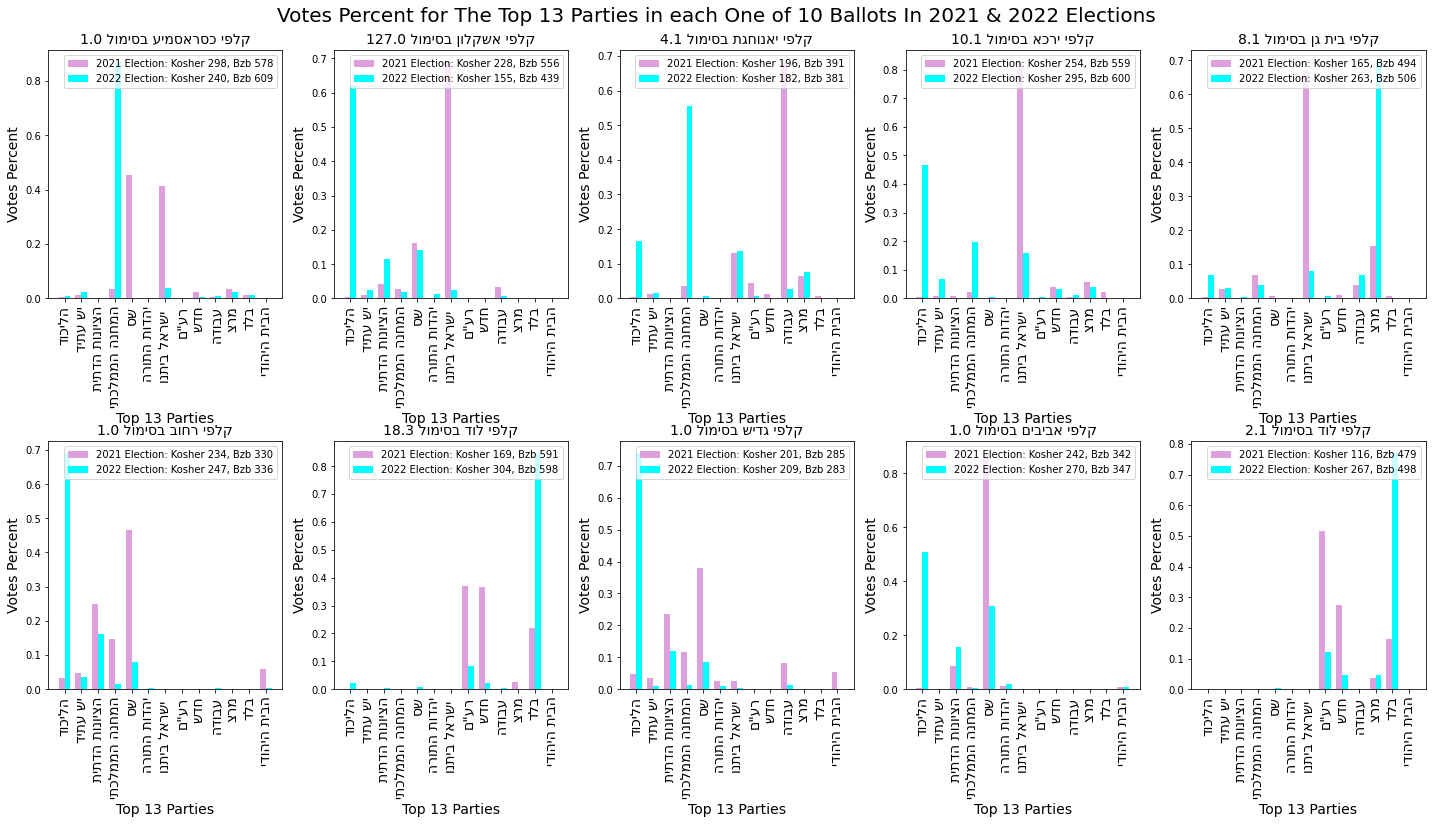

In [202]:
Create_double_bar_subplots(Top13_21.loc[AnswerB1.index], Top13_22.loc[AnswerB1.index])

מבחינת הגרפים הללו לא נראה כי ישנה חריגה מסויימת באחוזי התמיכה שקיבלה הבית היהודי. נזכיר כי מפלגת הבית היהודי היא מפלגה שלא רצה בשנה שעברה, ואף השנה לא עברה את אחוז החסימה מאחר ואספה אחוזי תמיכה מאוד נמוכים, ולכן היא לא תהווה גורם לחריגה בקלפי בראיית 13 המפלגות הגדולות.
על כן, כעת נציין חריגויות חשובות שזיהינו במפה הפוליטית כפי שעולה מקלפיות חריגות. בהמשך נבצע בדיקה בהדגש הבית היהודי- נבחן האם יש קלפיות משותפות שעולות בשתי הבדיקות.

נשים לב שיחס הקולות הכשרים אל מול מספר בעלי זכות הבחירה בבחירות 2021 קטן משמעותית מהיחס בבחירות 2022,
הדבר יכול לנבוע גם מירידה באחוז הבוחרים באותם מקומות, אך גם עלול להעלות מסקנה כי היו הרבה מצבים חריגים באותן קלפיות -> בין היתר הרבה קולות לא כשרים.
או שהיה תהליך של פסילת קולות לשווא, או שאכן היו הרבה קולות לא כשרים או שקיים חשש לפסילת קולות כשרים במקרה קיצון של זיוף והשפעה על תוצאות.

יישובים שהעלו אצלנו השערות בנוגע לחריגות המתקיימות בהם:
מצד אחד, ניתן להעלות את לוד - יישוב הבנוי על אוכלוסייה מעורבת- יהודית וערבית מכאן שהחריגה במקרה זה, נראת כהגיונית עבורנו- שכן הגיוני שתהיה תמיכה במפלגות כגון רעם, בלד וחדש ומנגד, ניתן לראות כי בשנת 2022 רבים מהקולות של המפלגות המזוהות לרוב עם אחוזי הצבעה גדולים באוכלוסיה הערבית, עברו למפלגת בלד- שגם היא מזוהה עם אחוזי הצבעה גבוהים של האוכלוסייה הערבית. ניתן להניח שבעקבות התפרקותה של הרשימה המשותפת לכדי מפלגות קטנות: בלד וחדש. את אחוזי ההצבעה ב21 למפלגות הקטנות ניתן לראות בגרף לאחר התיקון שביצענו, שכן הן לא היו קיימות בשנת 21

כסרא-סמיע העלתה עבורנו נורה אדומה, מאחר נראה שבבחירות 21 היו הצבעות ותמיכה חזקה בגוש הימין, שס, ישראל ביתנו ואילו ב22 נראה שהיה מעבר להצבעה חזקה עבור גוש השינוי ונראים אחוזי הצבעה גבוהים למחנה הממלכתי.

קלפי נוספת המעלה נורה אדומה דומה היא קלפי 4.1 של קלפי יאנוח ג'ת גם הוא יישוב דרוזי, שכן ב21 הייתה תמיכה חזקה מאוד בעבודה, ועם הקמתה של המחנה הממלכתי עברו הקולות אליה- הדבר ברמת הגושים לא משנה בפועל.

כעת נאתר את 10 הקלפיות בהן קיימים המרחקים הריבועיים הגדולים ביותר בין אחוזי ההצבעה לבית היהודי ב-2021 לבין 2022.


In [203]:
#כעת נמצא את 10 הקלפיות עבורן ההמרחק הריבועי בין שכיחויות ההצבעה היחסיות לבית היהודי בבחירות 2021 לבין השכיחויות בבחירות 2022 היו הגדולים ביותר
#Calculate the sum squred distances between the elections

In [204]:
pddis = (Top13_22["הבית היהודי"] - Top13_21["הבית היהודי"])**2
sumdis = pd.DataFrame(pddis)

sumdis.columns = ["SumSqureDis"]

AllData = sumdis.sort_values(by="SumSqureDis", ascending=False)
AnswerA = AllData.iloc[:10,:]

In [205]:
PartyBallotsNames = []
PartyBallots = []
for b in range(10):
  PartyBallotsNames.append(str(AnswerA.index.to_list()[b][1:]) + " " + AnswerA.index.to_list()[b][:1][0][::-1])
  PartyBallots.append(AnswerA.index.to_list()[b])

In [206]:
PartyVotes21 = []
for b in PartyBallots:
  PartyVotes21.append(Top13_21["הבית היהודי"].loc[b])

In [207]:
PartyVotes22 = []
for b in PartyBallots:
  PartyVotes22.append(Top13_22["הבית היהודי"].loc[b])

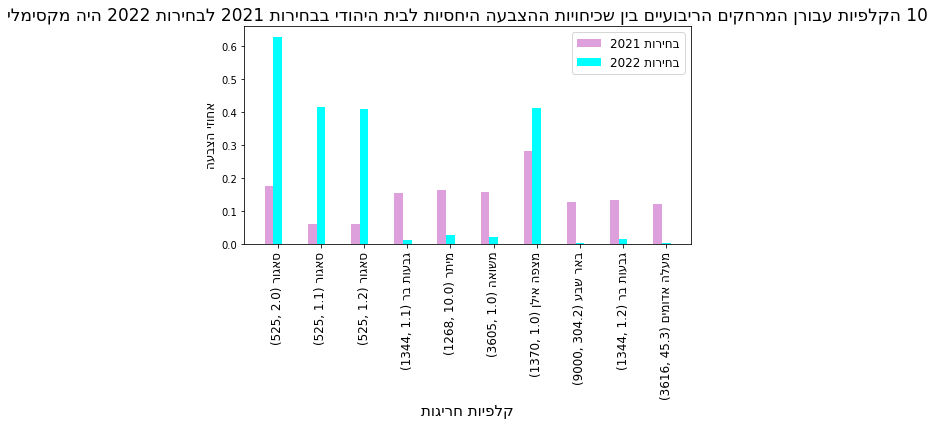

<Figure size 1440x216 with 0 Axes>

In [208]:
width = 0.2
X = np.arange(len(PartyVotes21))
ax = plt.subplot(111)
plt.title("01 הקלפיות עבורן המרחקים הריבועיים בין שכיחויות ההצבעה היחסיות לבית היהודי בבחירות 1202 לבחירות 2202 היה מקסימלי"[::-1], fontsize=17)
plt.rcParams["figure.figsize"] = [8,4]

ax.bar(X-width, PartyVotes21, width=0.2, color='plum', align='center')
ax.bar(X, PartyVotes22, width=0.2, color='cyan', align='center')

ax.legend(('בחירות 1202'[::-1],'בחירות 2202'[::-1]), fontsize = 12)

plt.xticks(X, PartyBallotsNames, fontsize = 12, rotation = 90)
ax.set_ylabel("אחוזי הצבעה"[::-1], fontsize = 12)
ax.set_xlabel("קלפיות חריגות"[::-1], fontsize = 15)

plt.figure(figsize=(20, 3))

plt.show()

נשים לב כי כלל הקלפיות שעלו כאן לא עלו בבדיקה הראשונה שעשינו.

קיבלנו 3 קלפיות חריגות בסאג'ור שמהווה ישוב דרוזי.
וכל שאר הקלפיות החריגות מצויות בישובים שונים עם ציביון תושבים שונה:  גבעות בר המזוהה כיישוב דתי-לאומי מצפה אילן, המכיל אוכלוסיה יהודית דתית ומעלה אדומים אשר מזוהה עם אוכלוסיה מעורבת של חרדים וחילוניים.

מצד אחד נוכל להסיק כי אולי חל ניסיון לשבש את הליכי הבחירות התקינות באותן קלפיות שכן קלפיות אלו לא עלו בבדיקה הראשונה שלנו, או שאולי חל שינוי בדעות השונות של אנשי הישוב לאורך השנה.

נשים לב כי 3 הקלפיות בסאגור מצויות באותו אזור, כך שיתכן שאוכלוסיה מסויימת בסאגור שינתה את הבחירה שלה בין שנת 2021 לבין שנת 2022 (שלוש הקלפיות המתוארות ממוקמות כולן בבתי ספר; בחטיבת הביניים ובמתנס היישוב).

נוכל להסיק כי יש השקה בין הגרף שאנו מציגות פה לגרף המתאר את הפרשי שכיחויות ההצבעה למפלגת הבית היהודי, גרף 

PCAה

ממנו עולים יישובים חריגים- לכן ניתן להניח כי העיגולים בעלי הצבעוניות הבהירה, חריגה, מייצגים את הקלפיות שעולות לפנינו כחריגות.